<a href="https://colab.research.google.com/github/tilakrvarma22/Story/blob/master/TitanicSurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Problem Statement
* As Titanic has been sunked undeer the sea. We have to find the whether a given person will survived or not.
* As it has rows and columns is a supervised learning problem.
* It is a binary CLassification problem as output must be as survived or not.
* `survived`:1
* `not_survived`:0

In [6]:
import pandas as pd

In [7]:
train=pd.read_csv("/content/sample_data/titantrain.csv")
test=pd.read_csv("/content/sample_data/titantest.csv")

# 2.Data Collection
As data has been collected from various sources and stored in a csv files.
* It can have inconsistent data.Can have missing values and categorical data
* to solve this issue we apply pipeline of code for numerical_cols and categorical_cols to handle it.
* but first we do remove some unnecessary columns

In [8]:
train_1=train.drop(["Name","Ticket"],axis=1)
test_1=test.drop(["Name","Ticket"],axis=1)

In [9]:
y=train_1["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
X=train_1.drop("Survived",axis=1)

In [11]:
X.columns==test_1.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [12]:
#Train test split

from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=1)

# 3.Pipeline
* It helps in automate the code and make reusable and make it easier for the engineer for model training and data preprocessing
* It invovles many preprocessing steps like simple imputer and onehotencoding for catgorical colmuns.


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


In [14]:
numerical_cols=[cols for cols in X.columns if X[cols].dtype!="object"]
numerical_cols

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [15]:
categorical_cols=[cols for cols in X.columns if X[cols].dtype=="object" and X[cols].nunique()<10]
categorical_cols

['Sex', 'Embarked']

In [16]:
X[categorical_cols].nunique()

Sex         2
Embarked    3
dtype: int64

In [17]:
numerical_transformer=SimpleImputer(strategy="constant")

categorical_transformer=Pipeline(steps=[
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("one",OneHotEncoder(handle_unknown="ignore"))])

preprocessor=ColumnTransformer(transformers=[
    ("num",numerical_transformer,numerical_cols),
    ("cat",categorical_transformer,categorical_cols)])

# 4.Model Training
After automating a preprocessing step now we have to do model training.
As it is binary classification problem so we will try every classification algorithm
* DecisonTreeClassifier
* RandomForestClassifier
* LogisticRegression
* SVMClassifier
* Naive Bayes (various algo depends upon data)
* XGBClassifier

## 1.Decision Tree Classifier
*   It is supervised learning problem.
*   In this we ask question to model on each level of tree so that it will make decision on basis of yes and no.
* internal nodes represents the features of dataset
* branches represents the decision rules
* leaf node represents the outcomes.
* Split_count determined how data has been partitioned
* It is rule_based approach for classsification and regression tasks.
* Earlier 2 types:
   1. ID3 (iterative dichotomiser 3)
   2. CART(Classsification And Regression Tasks)



In [18]:
from sklearn.tree import DecisionTreeClassifier

model_1=DecisionTreeClassifier(random_state=1)

In [19]:
my_pipeline=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",model_1)])

my_pipeline.fit(X_train,y_train)
preds=my_pipeline.predict(X_valid)

In [20]:
my_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['PassengerId', 'Pclass',
                                                   'Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('model', DecisionTreeClassifier(random_state=1))])

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
result=confusion_matrix(y_valid,preds)
result

array([[89, 17],
       [32, 41]])

 ### **Data Visualisation using matplotlib**

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def visualise_matrix(confu_matrix,title):
  total_actual_positive=np.sum(confu_matrix[0,:])
  total_actual_negative=np.sum(confu_matrix[1,:])
  total_predict_positive=np.sum(confu_matrix[:,0])
  total_predict_positive=np.sum(confu_matrix[:,1])

  #Create the confusion matrix plot
  fig,ax=plt.subplots()

  #Plot the confusion matrix
  cax=ax.matshow(confu_matrix,cmap=plt.cm.Blues)

  #Add a title
  plt.title(title)

  # Add a labels to the axes
  plt.xlabel("Predicted")
  plt.ylabel("Actual")

  #Add axis titles
  ax.set_xticks([0,1])
  ax.set_yticks([0,1])
  ax.set_xticklabels(["Positve","Negative"])
  ax.set_yticklabels(["Positve","Negative"])

  # Add count to each section
  for i in range(2):
    for j in range(2):
      plt.text(j,i,str(confu_matrix[i,j]),ha="center",va="center",color="Black")

  fig.colorbar(cax)
  plt.show()

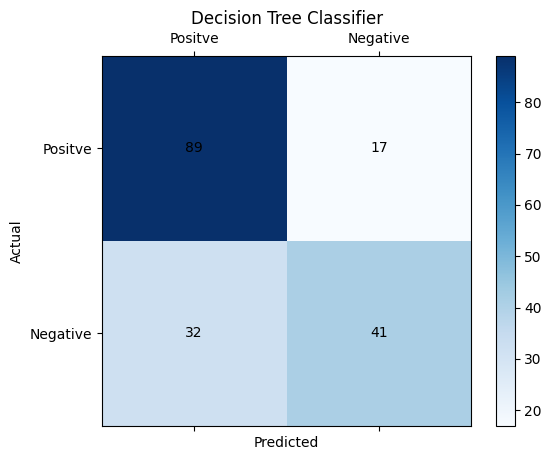

In [25]:
visualise_matrix(result,"Decision Tree Classifier")

In [26]:
submission_1=my_pipeline.predict(test)

In [27]:
id=np.arange(892,1310)
len(id),len(submission_1)

(418, 418)

In [28]:
data={"PassengerId":id,"Survived":submission_1}

sub_1=pd.DataFrame(data)

In [29]:
#sub_1.to_csv("sub_1.csv",index=False)

## 2.Logistic Regression
* It is popular supervised learning algorithm used for classification task.
* It models probability that a given input belongs to particular class or not.It does use a logistic function also called sigmoid function.
which maps any real valued between 0 and 1.
* Mathematical Intuition:
    `sigma(z)=1 / 1 + e^-z`
    z is linear combination of features
* Adv:
   1. Simple and Interpretable
   2. Efficient for binary classification
   3. Provide probablities, making it easy to set decision thresholds
* DisAdv:
   1. Assumes a linear relationship between features and log-odds
   2. May not perform well with a complex realtionships

In [30]:
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


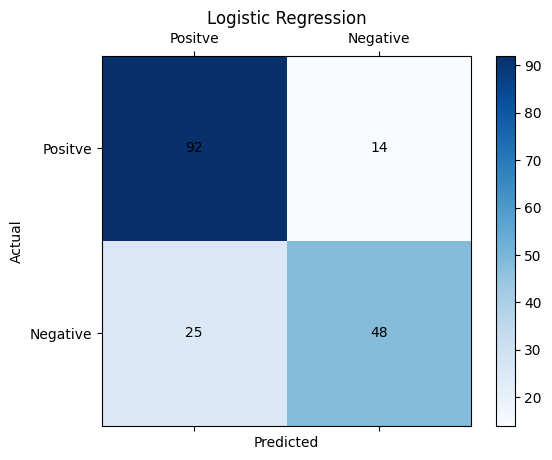

In [31]:
model_2=LogisticRegression(random_state=1)
my_pipeline_2=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",model_2)])
my_pipeline_2.fit(X_train,y_train)
preds_1=my_pipeline_2.predict(X_valid)
result_1=confusion_matrix(y_valid,preds_1)
visualise_matrix(result_1,"Logistic Regression")

In [32]:
from sklearn.metrics import precision_score

In [33]:
precision_score(y_valid,preds_1)

0.7741935483870968

In [34]:
submission_2=my_pipeline_2.predict(test)
data_1={"PassengerId":id,"Survived":submission_2}
sub_2=pd.DataFrame(data_1)
sub_2.to_csv("sub_2.csv",index=False)

## 3.CatBoost



In [35]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.6 MB/s eta 0:00:00


In [36]:
from catboost import CatBoostClassifier

model_3=CatBoostClassifier(random_state=1,
                           verbose=False,
                           iterations=100,
                           learning_rate=0.01,
                           depth=9,
                           custom_metric=['Logloss',"AUC"]) #height of decision tree

my_pipeline_3=Pipeline(steps=[
     ("preprocessor",preprocessor),
     ("model",model_3)])

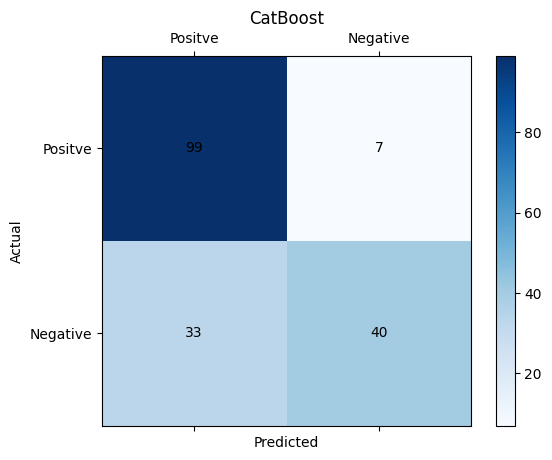

In [37]:
my_pipeline_3.fit(X_train,y_train)
preds_3=my_pipeline_3.predict(X_valid)
result_3=confusion_matrix(y_valid,preds_3)
visualise_matrix(result_3,"CatBoost")

In [38]:
precision_score(y_valid,preds_3)

0.851063829787234

In [39]:
submission_3=my_pipeline_3.predict(test)


In [40]:
data={"PassengerId":id,
      "Survived":submission_3}

In [41]:
sub_3=pd.DataFrame(data)
sub_3.to_csv("sub_3.csv",index=False)

## 4.Randoom Forest Classifier
* It is ensemble learning model.
* Ensemble learning invovles combining of predictions of multiple models to improve overall performance and accuracy.In the case of random forest, it combines the power of multiple decision trees to make more robust predictions
* Think of detective trying to decide will it rain? They ask questions like is it cloudy or is the wind strong and make a predictions based on the answers.
* Now picture a whole team of detectives.Each one is a bit different - they ask different questions and have different experiences. They all make thier predictions independently.
* Here is intresing part each detective only sees random part of the info and ask random ques. this randomness makes team more diverse like having detectives with different speciality.
* When its time to make a predictions for tomorrows weather each detective votes based on thier insights.The final decision is what most detectives agree on.


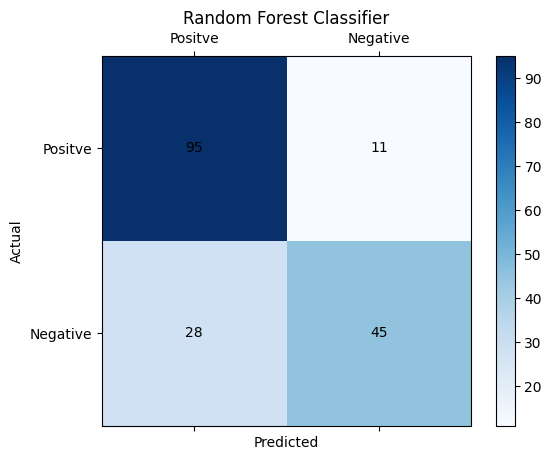

In [44]:
from sklearn.ensemble import RandomForestClassifier

model_4=RandomForestClassifier(random_state=1)

my_pipeline_4=Pipeline(steps=[
    ("prepropessor",preprocessor),
    ("model",model_4)])

my_pipeline_4.fit(X_train,y_train)
preds_4=my_pipeline_4.predict(X_valid)
result_4=confusion_matrix(y_valid,preds_4)
visualise_matrix(result_4,"Random Forest Classifier")

In [45]:
precision_score(y_valid,preds_4)

0.8035714285714286

## 5.Navie Bayes
* It is supervised learning classification algorithm which basically gives a binary or multi-class outputs.
* It is based on Bayes theorum.
* Bayes Theorum:

   ### `P(A|B)=P(B|A)*P(B)/P(A)`

 where
     P(A|B)=Probability of occuring B when A has already occured
     
     P(B|A)=Probability of occuring A if B has occured
     
     P(A)=Probability of occuring A
     
     P(B)=Probability of occuring B

### 1.GaussianNB
It is Naive Bayes algorithm which follows a Gaussian distribution.It is part of the bayes family of algorithms which are used for classifications task.


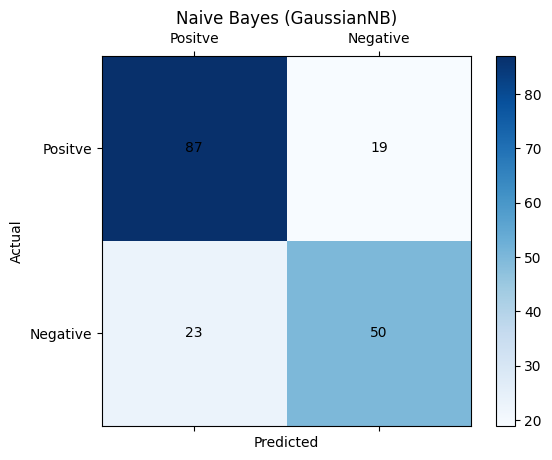

In [47]:
from sklearn.naive_bayes import GaussianNB

model_5=GaussianNB()
my_pipeline_5=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",model_5)])

my_pipeline_5.fit(X_train,y_train)
preds_5=my_pipeline_5.predict(X_valid)
result_5=confusion_matrix(y_valid,preds_5)
visualise_matrix(result_5,"Naive Bayes (GaussianNB)")

In [48]:
precision_score(y_valid,preds_5)

0.7246376811594203

**Note:**
* **If your data is Numeric**: if your features are continuos and follow a guassian distribution.
* **If your data is Textual**:If your features are based on word counts or frequencies in text data,
multinomial Naive Bayes is a good choice.
* **If your data is Binary**: If your features are binary(0 or 1) and represent presence or absence, bernoullis naive bayes might be suitable.

## 6.XGBoost **bold text**
* It is one of the powerful algorithm and efficient machine learning algorihtm that belongs to the ensemble learning methods.
* It is popular structue and tabler data.
* It is form of gradient boosting which means it focues on minimizing errors residuals in predictions It build trees sequentially with each new tree to fix the mistakes made by the existing ensemble
* Xtreme refers to extreme speed and performance.
Its designed to be highly efficient and can handle large datasets with many features.




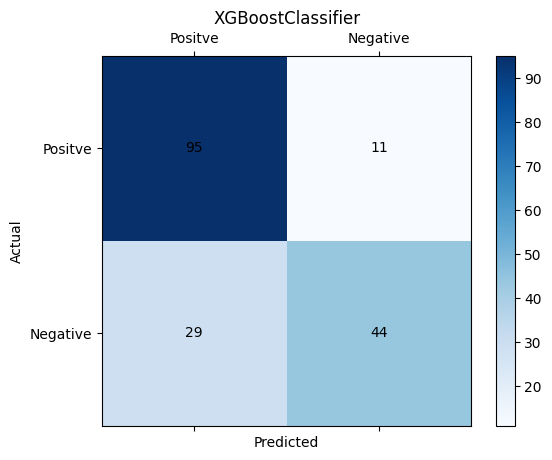

In [73]:
from xgboost import XGBClassifier

model_6=XGBClassifier(random_state=1,
                      n_estimators=300,
                      max_depth=10,
                      learning_rate=0.1)

my_pipeline_6=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",model_6)])
my_pipeline_6.fit(X_train,y_train)
preds_6=my_pipeline_6.predict(X_valid)
result_6=confusion_matrix(y_valid,preds_6)
visualise_matrix(result_6,"XGBoostClassifier")

In [74]:

precision_score(y_valid,preds_6)

0.8

# 5.Normalisation and Standardisation
* Both above are feature scaling methods which squeeze the features wieghts into a range of numerical values.
* It makes your data have mean of 0 and standard deviation of 1.


In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(with_mean=True,with_std=True)

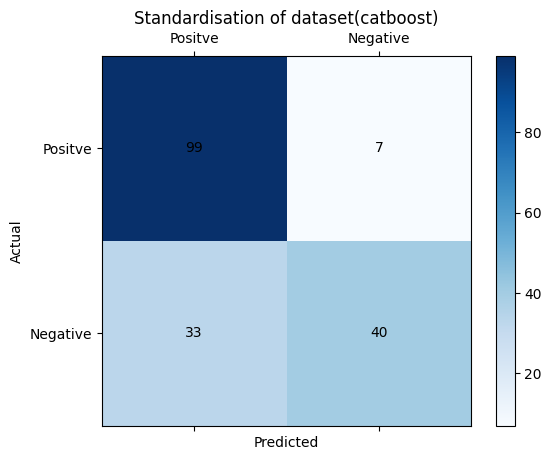

In [85]:
from catboost import CatBoostClassifier

model_7=CatBoostClassifier(random_state=1,
                           verbose=False,
                           iterations=100,
                           learning_rate=0.01,
                           depth=9,
                           custom_metric=['Logloss',"AUC"]) #height of decision tree

my_pipeline_7=Pipeline([
     ("preprocessor",preprocessor),
     ("scaler",scaler),
     ("model",model_3)])

my_pipeline_7.fit(X_train,y_train)
preds_7=my_pipeline_7.predict(X_valid)
result_7=confusion_matrix(y_valid,preds_7)
visualise_matrix(result_7,"Standardisation of dataset(catboost)")

In [87]:
precision_score(y_valid,preds_7)

0.851063829787234

In [88]:
submission_7=my_pipeline_7.predict(test)
data_7={"PassengerId":id,
        "Survived":submission_7}
sub_7=pd.DataFrame(data_7)
sub_7.to_csv("sub_7.csv",index=False)